In [1]:
import MisrToolkit as Mtk
from MisrToolkit import *
import os
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
atm_home = '/Volumes/SEAGATE/ATM_apr2016_5days'
os.path.isdir(atm_home)

True

In [3]:
roughness_dir = '/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH'

In [4]:
atm_file_pattern = ''
atm_filename = 'ILATM2_20160421_233051_smooth_nadir3seg_50pt.csv'
atm_file_found = glob.glob(os.path.join(atm_home, atm_filename))
atm_file_fp = atm_file_found[0]
print(atm_file_fp)


/Volumes/SEAGATE/ATM_apr2016_5days/ILATM2_20160421_233051_smooth_nadir3seg_50pt.csv


In [5]:
# extract date-time
date_time = atm_file_found[0].split('/')[-1].split('_')[1:3]
print(date_time)
mtk_date_time = date_time[0][0:4]+'-'+date_time[0][4:6]+'-'+date_time[0][6:8]+'T'+date_time[1][0:2]+':'+date_time[1][2:4]+':'+date_time[1][4:6]+'Z'
print(mtk_date_time)

# Time format: YYYY-MM-DDThh:mm:ssZ (ISO 8601)


['20160421', '233051']
2016-04-21T23:30:51Z


In [8]:
# find PO
orbit_path = Mtk.time_to_orbit_path(mtk_date_time)
print(orbit_path)
path = orbit_path[1]
orbit = orbit_path[0]

(86932, 79)


In [9]:
# open file
atm_df = pd.read_csv(atm_file_fp, header=9)
atm_df.head()

,# UTC_Seconds_Of_Day,Latitude(deg),Longitude(deg),WGS84_Ellipsoid_Height(m),South-to-North_Slope,West-to-East_Slope,RMS_Fit(cm),Number_Of_ATM_Measurments_Used,Number_Of_ATM_Measurements_Removed,Distance_Of_Block_To_The_Right_Of_Aircraft(m),Track_Identifier
0,84639.00,72.576148,204.099373,-2.8862,0.000000,0.000175,5.00,1072,24,71,1
1,84639.00,72.575864,204.100918,-2.8708,-0.000546,0.000000,5.46,639,16,10,2
2,84639.00,72.575579,204.102463,-2.8723,-0.000943,0.000585,6.35,1168,40,-50,3
3,84639.00,72.575815,204.101183,-2.8748,-0.000240,-0.000350,5.75,886,14,0,0
4,84639.25,72.575903,204.098899,-2.8555,-0.001211,-0.000737,6.98,1095,5,70,1


In [10]:
atm_df.shape

(7343, 11)

In [11]:
atm_bls_list = []

for irow in range(atm_df.shape[0]):
    xlon = atm_df[' Longitude(deg)'].iloc[irow]
    xlat = atm_df[' Latitude(deg)'].iloc[irow]
    atm_rms = atm_df[' RMS_Fit(cm)'].iloc[irow]
    
#     print(xlat)
#     print(xlon)
    bls = Mtk.latlon_to_bls(path, 275, xlat, xlon)
    bls_atm_roughness = [bls[0], bls[1], bls[2], atm_rms]
    atm_bls_list.append(bls_atm_roughness)

In [12]:
atm_bls_list

[[32, 96.8056640625, 653.949951171875, 5.0],
 [32, 96.8330078125, 654.1686401367188, 5.46],
 [32, 96.861328125, 654.3875122070312, 6.35],
 [32, 96.837890625, 654.2061767578125, 5.75],
 [32, 96.919921875, 653.9384155273438, 6.98],
 [32, 96.947265625, 654.1572875976562, 5.52],
 [32, 96.9755859375, 654.3759155273438, 6.68],
 [32, 96.9521484375, 654.1919555664062, 5.66],
 [32, 97.0322265625, 653.92724609375, 8.25],
 [32, 97.0595703125, 654.1456298828125, 5.75],
 [32, 97.087890625, 654.3643188476562, 6.76],
 [32, 97.0634765625, 654.17724609375, 5.91],
 [32, 97.1455078125, 653.9168701171875, 8.83],
 [32, 97.171875, 654.1345825195312, 5.58],
 [32, 97.1982421875, 654.3523559570312, 6.51],
 [32, 97.1748046875, 654.161865234375, 5.8],
 [32, 97.2568359375, 653.9046630859375, 8.14],
 [32, 97.2841796875, 654.123046875, 5.69],
 [32, 97.3115234375, 654.3417358398438, 5.54],
 [32, 97.2880859375, 654.1491088867188, 6.01],
 [32, 97.37109375, 653.8931274414062, 13.73],
 [32, 97.3994140625, 654.1117553710

In [13]:
# calculate mean ATM roughness in each pixel
# block, line, sample, mean ATM roughness
# for 
block = 32
list_b = []

for elem in atm_bls_list:
    #
    if (elem[0]!=32):
        continue
    # 
    atm_line_int = int(elem[1])
    atm_sample_int = int(elem[2])
    atm_roughness = elem[3]
    # if listB empty, add the first point
    if (len(list_b)==0):
        list_b.append([atm_line_int, atm_sample_int, atm_roughness])
    # check in listB if point exists
    found = 'no'
    for index_b in range(len(list_b)):
        atm_line_b = list_b[index_b][0]
        atm_sample_b = list_b[index_b][1]
        if ((atm_line_int == atm_line_b) & (atm_sample_int == atm_sample_b)):
#             print('found similar point in list-B, averaging')
            # only average roughness and add it, we do not change LS
            atm_rough_mean = (list_b[index_b][2]+atm_roughness)/2
            list_b[index_b][2] = atm_rough_mean # update list-B
            found = 'yes'
    if (found == 'no'):
        list_b.append([atm_line_int, atm_sample_int, atm_roughness])
    

In [14]:
list_b

[[96, 653, 5.99],
 [96, 654, 5.9184375],
 [97, 653, 14.024843749999999],
 [97, 654, 6.4862726952135565],
 [98, 653, 9.033925170898438],
 [98, 654, 5.521444854736329],
 [99, 654, 15.7055078125],
 [99, 653, 25.61650402605534],
 [100, 654, 18.01],
 [100, 653, 14.299282812748569],
 [101, 653, 7.388245195525233],
 [102, 653, 6.61154094393074],
 [103, 653, 19.93339560032822],
 [104, 653, 15.326167607344688],
 [104, 652, 14.554375],
 [105, 652, 7.5830078125],
 [105, 653, 15.895073693990707],
 [106, 653, 10.571435546875],
 [106, 652, 11.306577032804489],
 [107, 653, 7.1181640625],
 [107, 652, 8.469987295269966],
 [108, 652, 5.52866537526832],
 [108, 653, 8.0],
 [109, 652, 8.838800309225334],
 [110, 652, 5.6454421568242825],
 [111, 652, 23.99733613803022],
 [112, 651, 15.314023437500001],
 [112, 652, 27.336430399119855],
 [113, 652, 10.406682128906251],
 [113, 651, 22.052394850254057],
 [114, 652, 10.962187499999999],
 [114, 651, 6.457298081144691],
 [115, 651, 5.933504246107186],
 [116, 651, 1

In [15]:
#- find roughness file from pattern of roughness.dat file

roughness_file_pattern = "roughness_toa_refl_P0"+str(path)+"_O0"+str(orbit)+"_B0"+str(block)+".dat"
print('looking for pattern: %s' %roughness_file_pattern)

# find roughness file
rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))
print('found:')
print(rough_file_list)


looking for pattern: roughness_toa_refl_P079_O086932_B032.dat
found:
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P079_O086932_B032.dat']


In [16]:
# open roughness binary file and change binary to array
misr_rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
print(misr_rough_2d_arr.shape)


(512, 2048)


In [22]:
# extract each pixel/line-sample
final_roughness_list = []

for elem2 in list_b:
    atm_block = 23
    atm_line = elem2[0]
    atm_sample = elem2[1]
    atm_mean_roughness = elem2[2]
    # extract misr-roughness from 2D array for that line-sample
    misr_roughness = misr_rough_2d_arr[atm_line, atm_sample]
    final_roughness_list.append([atm_block, atm_line, atm_sample, atm_mean_roughness, misr_roughness])
    

In [23]:
final_roughness_list

[[23, 96, 653, 5.99, 16.805063670900616],
 [23, 96, 654, 5.9184375, 16.489351253928913],
 [23, 97, 653, 14.024843749999999, 16.989350202313076],
 [23, 97, 654, 6.4862726952135565, 17.120855700168033],
 [23, 98, 653, 9.033925170898438, 16.754513949645318],
 [23, 98, 654, 5.521444854736329, 16.724423407415497],
 [23, 99, 654, 15.7055078125, 16.94795559331048],
 [23, 99, 653, 25.61650402605534, 16.946875445359883],
 [23, 100, 654, 18.01, 16.823440994428385],
 [23, 100, 653, 14.299282812748569, 16.205755308357688],
 [23, 101, 653, 7.388245195525233, 16.93391197333236],
 [23, 102, 653, 6.61154094393074, 16.71336309195421],
 [23, 103, 653, 19.93339560032822, 16.188946374071527],
 [23, 104, 653, 15.326167607344688, 20.218665562309106],
 [23, 104, 652, 14.554375, 15.763276701717215],
 [23, 105, 652, 7.5830078125, 5.349999904632568],
 [23, 105, 653, 15.895073693990707, 16.472626314537685],
 [23, 106, 653, 10.571435546875, 18.285398013768102],
 [23, 106, 652, 11.306577032804489, 14.3847795666907

In [24]:
# build a dataframe from list
plot_ds_colName = ['block', 'line', 'sample', 'atm_mean_rms', 'misr_rms']
plot_df = pd.DataFrame(final_roughness_list, columns=plot_ds_colName)
plot_df

,block,line,sample,atm_mean_rms,misr_rms
0,23,96,653,5.990000,16.805064
1,23,96,654,5.918437,16.489351
2,23,97,653,14.024844,16.989350
3,23,97,654,6.486273,17.120856
4,23,98,653,9.033925,16.754514
...,...,...,...,...,...
320,23,303,628,5.940000,12.487814
321,23,304,627,11.386105,13.535164
322,23,305,627,18.414106,18.004739
323,23,306,627,18.020563,12.873375


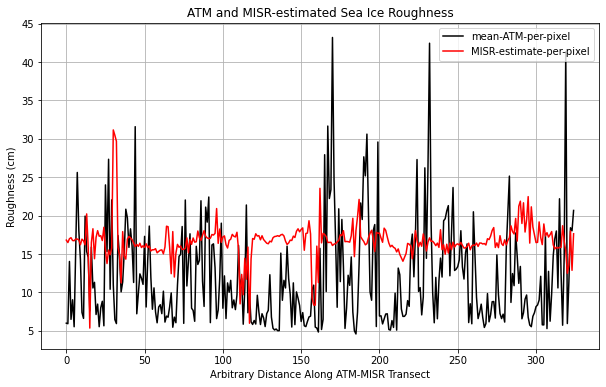

In [25]:
# plot transect
x= range(plot_df.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, plot_df['atm_mean_rms'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, plot_df['misr_rms'], color='red', label='MISR-estimate-per-pixel')

# Same as above
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

Text(0.5, 1.0, 'Histogram')

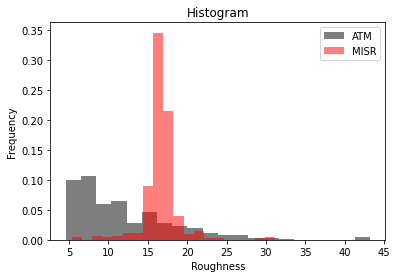

In [26]:
plt.hist(plot_df['atm_mean_rms'], density=True, bins=20, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(plot_df['misr_rms'], density=True, bins=20, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")
